Bryan Jay - 260738764

# Part 2 - Edge Detection 
### 2.1 Sobel Edge Detector


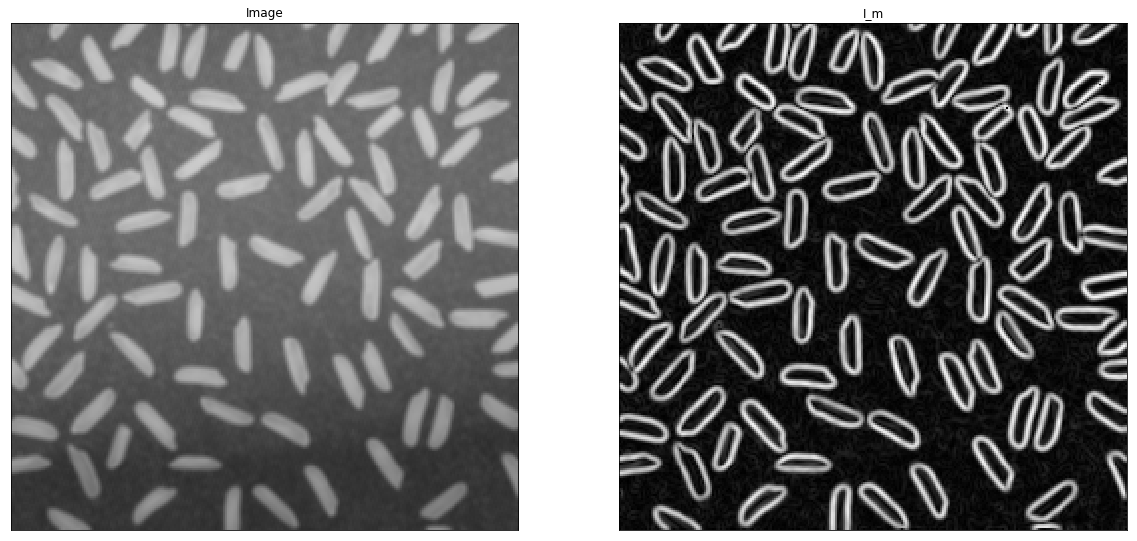

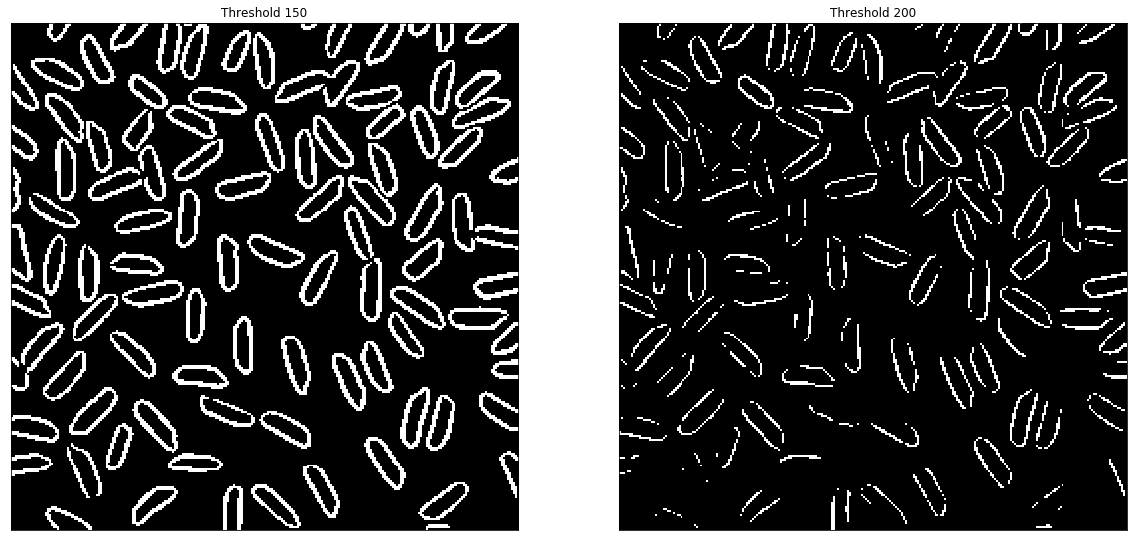

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Question 1
# load image
rice_path = './rice.png'
image = cv2.imread(rice_path)

# apply 3x3 Sobel filters
I_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)

# sharpen the sobel edges using certain thresholds 
ret, img150 = cv2.threshold(I_m, 150, 255, cv2.THRESH_BINARY)
ret, img200 = cv2.threshold(I_m, 200, 255, cv2.THRESH_BINARY)

# display images 
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(image, cmap="gray")
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_m.astype(np.uint8), cmap="gray")
plt.title("I_m"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img150.astype(np.uint8), cmap="gray")
plt.title("Threshold 150"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img200.astype(np.uint8), cmap="gray")
plt.title("Threshold 200"), plt.xticks([]), plt.yticks([])
plt.show()

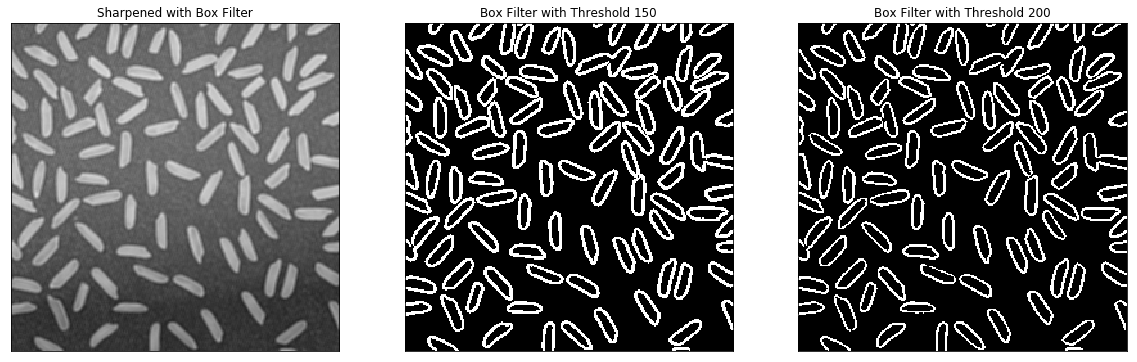

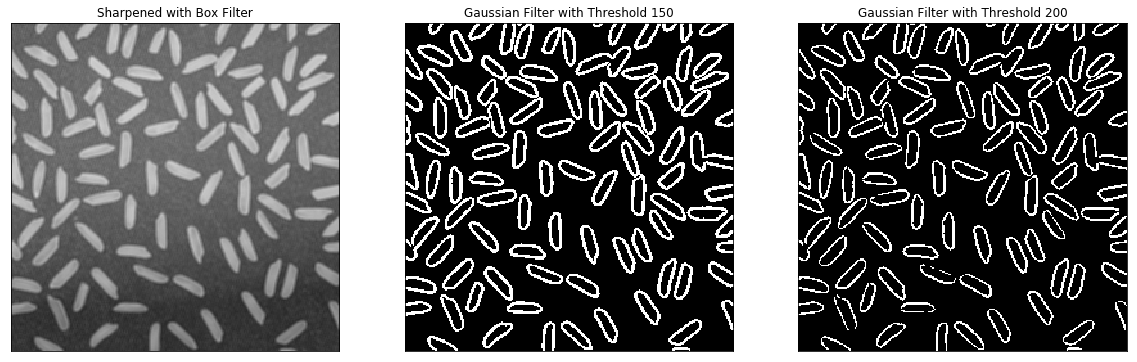

In [18]:
# Resharpen the images like the prev question and apply the sobel edge

# create a box filter 5x5
kernel = np.ones((5,5), np.float32)/(5*5)

# filter using box filter
box_img = cv2.filter2D(image, -1, kernel)

# filter using gaussian filter
sqrt_2 = np.sqrt(2)
gauss_img = cv2.GaussianBlur(image, (5,5), 0, sqrt_2)

# calculate details for sharpening
box_dets = image - box_img
gauss_dets = image - gauss_img

# calculate sharpened image
box_img_sharp = image + box_dets
gauss_img_sharp = image + gauss_dets

# apply 3x3 Sobel filters on both images 
I_x_boxFilter = cv2.Sobel(box_img_sharp, cv2.CV_64F, 1, 0, ksize=3)
I_y_boxFilter = cv2.Sobel(box_img_sharp, cv2.CV_64F, 0, 1, ksize=3)

I_x_gaussFilter = cv2.Sobel(gauss_img_sharp, cv2.CV_64F, 1, 0, ksize=3)
I_y_gaussFilter = cv2.Sobel(gauss_img_sharp, cv2.CV_64F, 0, 1, ksize=3)

# compute sobel Magnitude/Phase for both images
I_m_boxFilter = cv2.magnitude(I_x_boxFilter, I_y_boxFilter)

I_m_gaussFilter = cv2.magnitude(I_x_gaussFilter, I_y_gaussFilter)

# sharpen the sobel edges using certain thresholds 
ret, img150_boxFilter = cv2.threshold(I_m_boxFilter, 150, 255, cv2.THRESH_BINARY)
ret, img200_boxFilter = cv2.threshold(I_m_boxFilter, 200, 255, cv2.THRESH_BINARY)

ret, img150_gaussFilter = cv2.threshold(I_m_gaussFilter, 150, 255, cv2.THRESH_BINARY)
ret, img200_gaussFilter = cv2.threshold(I_m_gaussFilter, 200, 255, cv2.THRESH_BINARY)

# display images 
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(box_img_sharp.astype(np.uint8), cmap="gray")
plt.title("Sharpened with Box Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img150_boxFilter.astype(np.uint8), cmap="gray")
plt.title("Box Filter with Threshold 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img200_boxFilter.astype(np.uint8), cmap="gray")
plt.title("Box Filter with Threshold 200"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(gauss_img_sharp.astype(np.uint8), cmap="gray")
plt.title("Sharpened with Box Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img150_gaussFilter.astype(np.uint8), cmap="gray")
plt.title("Gaussian Filter with Threshold 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img200_gaussFilter.astype(np.uint8), cmap="gray")
plt.title("Gaussian Filter with Threshold 200"), plt.xticks([]), plt.yticks([])
plt.show()

#### #1 - Part 3: Comment on the eectiveness of using sharpening prior to the edge detection.
The effect of sharpening an image before applying sobel edge detection makes a major difference especially at higher thresholds. This is due to the fact that when we sharpen an image it is essentially making the edges stronger by creating a bigger gradient along them. This allows the sobel filter to be still valid at higher thresholds.

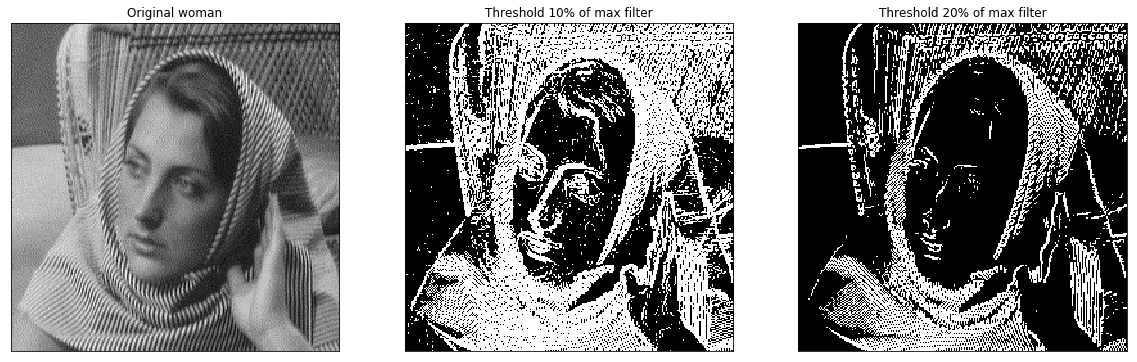

In [22]:
# Question 2
woman_img = cv2.imread('./woman.png', cv2.IMREAD_GRAYSCALE)

# apply the 3x3 sobel filter 
I_x = cv2.Sobel(woman_img, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(woman_img, cv2.CV_64F, 0, 1, ksize=3)

# calculate the margniture
I_m = cv2.magnitude(I_x, I_y)

# calculate the maximum filter response and the other percentages
maxFilter = np.amax(I_m)
tenPerFilter = maxFilter*0.1
twentyPerFilter = maxFilter*0.2

# filter image with the threshold values
ret, womanThresh10 = cv2.threshold(I_m, tenPerFilter, 255, cv2.THRESH_BINARY)
ret, womanThresh20 = cv2.threshold(I_m, twentyPerFilter, 255, cv2.THRESH_BINARY)

# display images 
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(woman_img.astype(np.uint8), cmap="gray")
plt.title("Original woman"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(womanThresh10.astype(np.uint8), cmap="gray")
plt.title("Threshold 10% of max filter"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(womanThresh20.astype(np.uint8), cmap="gray")
plt.title("Threshold 20% of max filter"), plt.xticks([]), plt.yticks([])
plt.show()

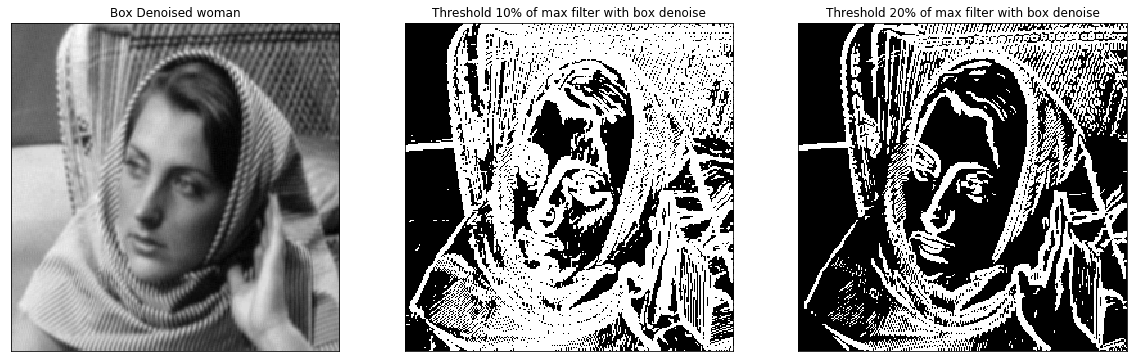

In [37]:
# create 3x3 box filter 
kernel = np.ones((3,3), np.float32)/(3*3)

# filter using box filter
box_img = cv2.filter2D(woman_img, -1, kernel)

# apply the 3x3 sobel filter 
womanBoxFilter_x = cv2.Sobel(box_img, cv2.CV_64F, 1, 0, ksize=3)
womanBoxFilter_y = cv2.Sobel(box_img, cv2.CV_64F, 0, 1, ksize=3)

# calculate the margniture
womanBoxFilter_m = cv2.magnitude(womanBoxFilter_x, womanBoxFilter_y)

# calculate the maximum filter response and the other percentages
maxFilter = np.amax(womanBoxFilter_m)
tenPerFilter = maxFilter*0.1
twentyPerFilter = maxFilter*0.2

# filter image with the threshold values
ret, womanThresh10 = cv2.threshold(I_m, tenPerFilter, 255, cv2.THRESH_BINARY)
ret, womanThresh20 = cv2.threshold(I_m, twentyPerFilter, 255, cv2.THRESH_BINARY)

# filter image with the threshold values
ret, womanBoxThresh10 = cv2.threshold(womanBoxFilter_m, tenPerFilter, 255, cv2.THRESH_BINARY)
ret, womanBoxThresh20 = cv2.threshold(womanBoxFilter_m, twentyPerFilter, 255, cv2.THRESH_BINARY)

# display images 
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(box_img.astype(np.uint8), cmap="gray")
plt.title("Box Denoised woman"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(womanBoxThresh10.astype(np.uint8), cmap="gray")
plt.title("Threshold 10% of max filter with box denoise"), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(womanBoxThresh20.astype(np.uint8), cmap="gray")
plt.title("Threshold 20% of max filter with box denoise"), plt.xticks([]), plt.yticks([])
plt.show()



#### #2 - Part3: Comment on the effectiveness of using denoising prior to edge detection.

The effect of denoising aids the edge detection because Sobel detection performs a gradient calculation in order to find the edges. When the noise is removed with the box filter, it helps the gradient recognize all edges by avoiding other possible false positives. The best resulting image is when taking the 20% threshold for the box filter.